In [1]:
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
rides_dataA_raw = pd.read_csv("Rides_DataA.csv")
rides_dataB_raw = pd.read_csv("Rides_DataB.csv")
Weather_Data = pd.read_csv("Weather_Data.csv")

/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_96125/1909450748.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  rides_dataB_raw = pd.read_csv("Rides_DataB.csv")


In [3]:
rides_dataA_raw.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.071,38.655,0,NaN,NaN,2016-06-04 00:14:11-05:00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.038,38.679,0,NaN,NaN,2016-06-04 01:50:02-05:00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-121.042,38.678,0,NaN,NaN,2016-06-04 03:16:01-05:00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-97.764,30.247,1,NaN,NaN,2016-06-04 10:01:19-05:00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,NaN,b'REGULAR',NaN,0.0,-97.750,30.269,2,NaN,NaN,2016-06-04 10:24:15-05:00


In [4]:
rides_dataA_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   RIDE_ID                  1494125 non-null  int64  
 1   started_on               1494125 non-null  object 
 2   created_date             1494125 non-null  object 
 3   updated_date             1494125 non-null  object 
 4   completed_on             1494125 non-null  object 
 5   distance_travelled       1494123 non-null  float64
 6   end_location_lat         1494125 non-null  float64
 7   end_location_long        1494125 non-null  float64
 8   driver_rating            1355725 non-null  float64
 9   rider_rating             1468193 non-null  float64
 10  active_driver_id         1494125 non-null  int64  
 11  charity_id               369561 non-null   float64
 12  requested_car_category   1494125 non-null  object 
 13  free_credit_used         225394 non-null  

In [5]:
rides_dataB_raw.head()

,RIDE_ID,base_fare,total_fare,rate_per_mile,rate_per_minute,time_fare,driver_accepted_on,esimtated_time_arrive,tipped_on,tip,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,1.5,25.84,1.5,0.25,2.18,NaN,NaN,NaN,NaN,...,2016-06-04 05:10:19,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
1,1,1.5,5.00,1.5,0.25,0.41,NaN,NaN,NaN,NaN,...,2016-06-04 06:47:39,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
2,2,1.5,5.00,1.5,0.25,0.48,NaN,NaN,NaN,NaN,...,2016-06-04 08:13:07,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
3,3,1.5,8.93,1.5,0.25,2.11,NaN,NaN,NaN,NaN,...,2016-06-04 14:52:35,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.0
4,4,1.5,5.00,1.5,0.25,0.43,NaN,NaN,NaN,NaN,...,2016-06-04 15:23:25,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.0


In [6]:
rides_dataB_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   RIDE_ID                    1494125 non-null  int64  
 1   base_fare                  1494125 non-null  float64
 2   total_fare                 1494123 non-null  float64
 3   rate_per_mile              1494125 non-null  float64
 4   rate_per_minute            1494125 non-null  float64
 5   time_fare                  1494123 non-null  float64
 6   driver_accepted_on         1494059 non-null  object 
 7   esimtated_time_arrive      1415588 non-null  object 
 8   tipped_on                  430895 non-null   object 
 9   tip                        430895 non-null   float64
 10  driving_time_to_rider      1472302 non-null  float64
 11  dispatch_location_lat      1494125 non-null  float64
 12  dispatch_location_long     1494125 non-null  float64
 13  driving_dist

In [7]:
Weather_Data.head()

,RIDE_ID,HOURLYVISIBILITY,HOURLYDRYBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYPrecip,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed
0,0,8.75,20.700000,94.0,6.0,13.333333,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,1.63,NaN,NaN
1,1,6.00,21.100000,93.0,1.5,0.000000,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
2,2,10.00,23.033333,88.0,5.0,350.000000,NaN,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
3,3,10.00,26.700000,64.0,11.0,360.000000,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
4,4,10.00,26.700000,64.0,11.0,360.000000,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN


In [8]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494125 entries, 0 to 1494124
Data columns (total 16 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   RIDE_ID                         1494125 non-null  int64  
 1   HOURLYVISIBILITY                1484509 non-null  float64
 2   HOURLYDRYBULBTEMPC              1491343 non-null  float64
 3   HOURLYRelativeHumidity          1475667 non-null  float64
 4   HOURLYWindSpeed                 1481350 non-null  float64
 5   HOURLYWindDirection             1140880 non-null  float64
 6   HOURLYPrecip                    1420991 non-null  float64
 7   DAILYMaximumDryBulbTemp         83123 non-null    float64
 8   DAILYMinimumDryBulbTemp         83123 non-null    float64
 9   DAILYDeptFromNormalAverageTemp  83123 non-null    float64
 10  DAILYAverageRelativeHumidity    36318 non-null    float64
 11  DAILYSunrise                    1493167 non-null  float64
 12  

### clean rideA & rideB

In [9]:
rides_dataA = clean_byte_string_columns(rides_dataA_raw)
rides_dataB = clean_byte_string_columns(rides_dataB_raw)

In [10]:
rides_dataA.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,NaN,REGULAR,NaN,0.0,-121.071,38.655,0,NaN,NaN,2016-06-04 00:14:11-05:00
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,NaN,REGULAR,NaN,0.0,-121.038,38.679,0,NaN,NaN,2016-06-04 01:50:02-05:00
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,NaN,REGULAR,NaN,0.0,-121.042,38.678,0,NaN,NaN,2016-06-04 03:16:01-05:00
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,NaN,REGULAR,NaN,0.0,-97.764,30.247,1,NaN,NaN,2016-06-04 10:01:19-05:00
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,NaN,REGULAR,NaN,0.0,-97.750,30.269,2,NaN,NaN,2016-06-04 10:24:15-05:00


In [11]:
rides_dataB.head()

,RIDE_ID,base_fare,total_fare,rate_per_mile,rate_per_minute,time_fare,driver_accepted_on,esimtated_time_arrive,tipped_on,tip,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,1.5,25.84,1.5,0.25,2.18,NaN,NaN,NaN,NaN,...,2016-06-04 05:10:19,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
1,1,1.5,5.00,1.5,0.25,0.41,NaN,NaN,NaN,NaN,...,2016-06-04 06:47:39,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
2,2,1.5,5.00,1.5,0.25,0.48,NaN,NaN,NaN,NaN,...,2016-06-04 08:13:07,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
3,3,1.5,8.93,1.5,0.25,2.11,NaN,NaN,NaN,NaN,...,2016-06-04 14:52:35,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.0
4,4,1.5,5.00,1.5,0.25,0.43,NaN,NaN,NaN,NaN,...,2016-06-04 15:23:25,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.0


### join full df

In [12]:
rides_dataB_filtered = rides_dataB.query(" status != 'DECLINED' ")
rides_data = pd.merge(rides_dataA, rides_dataB_filtered, how='inner', on='RIDE_ID', suffixes=('_A', '_B'))

In [13]:
rides_data.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,2016-06-04 05:10:19,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,2016-06-04 06:47:39,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,2016-06-04 08:13:07,DISPATCHED,0,0,Gray,Bentley,Continental GT,2013,1,5.0
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,2016-06-04 14:52:35,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.0
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,2016-06-04 15:23:25,DISPATCHED,1,1,Black,Cadillac,XTS,2013,21,5.0


In [14]:
# Convert to datetime with error handling
rides_data['created_date'] = pd.to_datetime(rides_data['created_date'], errors='coerce')
rides_data['driver_reached_on'] = pd.to_datetime(rides_data['driver_reached_on'], errors='coerce')

# Calculate wait time
rides_data['customer_wait_time'] = rides_data['driver_reached_on'] - rides_data['created_date']

# Remove rows with invalid data
rides_data = rides_data.dropna(subset=['customer_wait_time'])

# Check if we have a proper timedelta column
print(f"Data type of customer_wait_time: {rides_data['customer_wait_time'].dtype}")

# Only proceed if it's actually a timedelta
if pd.api.types.is_timedelta64_dtype(rides_data['customer_wait_time']):
    rides_data['customer_wait_time_seconds'] = rides_data['customer_wait_time'].dt.total_seconds().astype(int)
else:
    print("customer_wait_time is not a timedelta. Converting manually...")
    # Force convert to timedelta if possible
    rides_data['customer_wait_time'] = pd.to_timedelta(rides_data['customer_wait_time'], errors='coerce')
    rides_data = rides_data.dropna(subset=['customer_wait_time'])
    rides_data['customer_wait_time_seconds'] = rides_data['customer_wait_time'].dt.total_seconds().astype(int)

/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_96125/3516949908.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  rides_data['created_date'] = pd.to_datetime(rides_data['created_date'], errors='coerce')
/var/folders/5s/jq_rsff123s3hz43c0w63gy40000gn/T/ipykernel_96125/3516949908.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  rides_data['driver_reached_on'] = pd.to_datetime(rides_data['driver_reached_on'], errors='coerce')


Data type of customer_wait_time: object
customer_wait_time is not a timedelta. Converting manually...


In [15]:
# Add distance column
rides_data = add_travel_distance_miles(
    rides_data, 
    lat1_col='start_location_lat', 
    long1_col='start_location_long',
    lat2_col='end_location_lat', 
    long2_col='end_location_long'
)

In [16]:
rides_data[['start_location_lat', 'start_location_long', 'end_location_lat', 'end_location_long', 'travel_distance_miles']].tail()

,start_location_lat,start_location_long,end_location_lat,end_location_long,travel_distance_miles
1045439,30.297,-97.721,30.291,-97.741,1.263215
1045440,30.197,-97.767,30.223,-97.843,4.880866
1045441,30.247,-97.750,30.262,-97.762,1.259861
1045442,30.376,-97.852,30.266,-97.741,10.079908
1045443,30.277,-97.739,30.270,-97.736,0.515751


In [17]:
rides_data.tail()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,car_id,color,make,model,year,car_categories_bitmask,rating,customer_wait_time,customer_wait_time_seconds,travel_distance_miles
1045439,1494119,2017-04-13 18:59:07-05:00,2017-04-13 18:53:58-05:00,2017-04-13 23:54:18-05:00,2017-04-13 19:08:54-05:00,3532.0,30.291,-97.741,5.0,5.0,...,808,Black,Hyundai,Sonata,2015,1,4.87,0 days 00:05:01,301,1.263215
1045440,1494120,2017-04-13 18:59:13-05:00,2017-04-13 18:55:36-05:00,2017-04-13 19:16:26-05:00,2017-04-13 19:15:52-05:00,9374.0,30.223,-97.843,5.0,5.0,...,4620,Black,Toyota,Yaris,2007,1,4.62,0 days 00:03:04,184,4.880866
1045441,1494121,2017-04-13 18:59:16-05:00,2017-04-13 18:56:41-05:00,2017-04-14 19:07:18-05:00,2017-04-13 19:07:14-05:00,2954.0,30.262,-97.762,NaN,5.0,...,248,Red,Toyota,Camry,2008,1,4.95,0 days 00:01:51,111,1.259861
1045442,1494123,2017-04-13 18:59:31-05:00,2017-04-13 18:41:53-05:00,2017-04-14 06:01:58-05:00,2017-04-13 19:24:20-05:00,25021.0,30.266,-97.741,5.0,5.0,...,4064,White,Chevrolet,Impala,2012,1,4.63,0 days 00:09:52,592,10.079908
1045443,1494124,2017-04-13 18:59:43-05:00,2017-04-13 18:55:28-05:00,2017-04-15 12:07:06-05:00,2017-04-13 19:02:31-05:00,1129.0,30.270,-97.736,5.0,5.0,...,522,White,Nissan,Sentra,2014,1,4.86,0 days 00:04:10,250,0.515751


In [18]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044610 entries, 0 to 1045443
Data columns (total 47 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   RIDE_ID                     1044610 non-null  int64          
 1   started_on                  1044610 non-null  object         
 2   created_date                1044610 non-null  object         
 3   updated_date                1044610 non-null  object         
 4   completed_on                1044610 non-null  object         
 5   distance_travelled          1044610 non-null  float64        
 6   end_location_lat            1044610 non-null  float64        
 7   end_location_long           1044610 non-null  float64        
 8   driver_rating               948716 non-null   float64        
 9   rider_rating                1027147 non-null  float64        
 10  active_driver_id            1044610 non-null  int64          
 11  charity_id      

In [19]:
##NOTE: ADD FIRST RIDE FOR DRIVER & RIDER IF RATING IS NULL
##NOTE: FILLNA W/ 0 FOR RATING IS NULL

### plots

In [20]:
cols_to_keep = ['rider_rating', 'requested_car_category', 'surge_factor', 'rider_id', 'base_fare', 'rate_per_mile', 'rate_per_minute', 'travel_distance_miles', 'customer_wait_time_seconds']

In [21]:
rides_data_condense = rides_data[cols_to_keep]
rides_data_condense.head()

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
0,5.0,REGULAR,0.0,0,1.5,1.5,0.25,2.255262,232
1,5.0,REGULAR,0.0,0,1.5,1.5,0.25,0.214196,143
2,5.0,REGULAR,0.0,0,1.5,1.5,0.25,0.212807,174
3,5.0,REGULAR,0.0,1,1.5,1.5,0.25,2.115222,524
4,5.0,REGULAR,0.0,2,1.5,1.5,0.25,0.119355,50


In [33]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1027147.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00,1044610.00
mean,4.89,1.10,95274.64,1.58,1.10,0.26,3.66,-2541.33
std,0.54,0.40,72363.46,0.38,0.39,0.03,19.98,2038410.80
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1473173616.00
25%,5.00,1.00,31209.00,1.50,0.99,0.25,1.29,136.00
50%,5.00,1.00,83480.00,1.50,0.99,0.25,2.42,232.00
75%,5.00,1.00,149281.00,1.50,0.99,0.25,4.96,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,6681.76,56704.00


In [34]:
rides_data_condense = rides_data_condense[rides_data_condense['customer_wait_time_seconds'] > 0]

In [37]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1027144.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00,1044607.00
mean,4.89,1.10,95274.87,1.58,1.10,0.26,3.66,279.20
std,0.54,0.40,72363.44,0.38,0.39,0.03,19.98,225.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,5.00,1.00,31209.00,1.50,0.99,0.25,1.29,136.00
50%,5.00,1.00,83480.00,1.50,0.99,0.25,2.42,232.00
75%,5.00,1.00,149281.00,1.50,0.99,0.25,4.96,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,6681.76,56704.00


In [ ]:
rides_data_condense.sort_values(by=['travel_distance_miles'], ascending=False).head(15)

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
608378,5.00,SUV,1.25,150956,3.00,2.60,0.35,6681.76,315
662805,5.00,REGULAR,1.00,34104,1.50,0.99,0.25,6680.70,348
560723,5.00,REGULAR,1.00,163325,1.50,0.99,0.25,6680.53,124
736470,5.00,REGULAR,1.00,198114,1.50,0.99,0.25,6680.23,194
706552,5.00,REGULAR,1.00,190999,1.50,0.99,0.25,6678.90,6
738729,5.00,REGULAR,1.00,121918,1.50,0.99,0.25,6676.35,211
661176,5.00,REGULAR,1.00,182367,1.50,0.99,0.25,6676.35,186
702901,5.00,SUV,1.00,190380,3.00,2.60,0.35,6676.30,159
699403,5.00,REGULAR,1.00,189719,1.50,0.99,0.25,6676.29,43
63791,5.00,REGULAR,1.00,99,1.50,1.50,0.25,1220.10,18


In [45]:
# AUSTIN --> HOUSTON = 165mi
# AUSTIN --> DALLAS = 195mi
# AUSTIN --> SAN ANTONIO = 80mi
rides_data_condense = rides_data_condense[(rides_data_condense['travel_distance_miles'] < 200) & (rides_data_condense['travel_distance_miles'] > 0)]

In [46]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1019488.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00,1036467.00
mean,4.89,1.10,95343.32,1.58,1.10,0.26,3.63,279.18
std,0.53,0.40,72369.32,0.37,0.39,0.03,3.58,224.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.00
25%,5.00,1.00,31312.00,1.50,0.99,0.25,1.31,137.00
50%,5.00,1.00,83583.00,1.50,0.99,0.25,2.44,232.00
75%,5.00,1.00,149350.00,1.50,0.99,0.25,5.00,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,189.59,56704.00


In [47]:
rides_data_condense.sort_values(by=['customer_wait_time_seconds'], ascending=False).head(15)

,rider_rating,requested_car_category,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
115089,5.00,REGULAR,1.50,51378,1.50,0.99,0.25,3.68,56704
231269,5.00,REGULAR,2.50,89792,1.50,0.99,0.25,15.64,27436
40186,5.00,REGULAR,1.00,10561,1.50,1.50,0.25,6.42,20688
258240,5.00,REGULAR,1.00,4477,1.50,0.99,0.25,8.14,15156
135526,5.00,REGULAR,1.00,21750,1.50,0.99,0.25,10.61,13593
431052,2.00,REGULAR,1.00,136675,1.50,0.99,0.25,1.82,10096
464809,5.00,REGULAR,1.00,117413,1.50,0.99,0.25,1.13,9006
59550,5.00,REGULAR,1.00,31324,1.50,1.50,0.25,3.05,7612
59515,5.00,REGULAR,1.00,31305,1.50,1.50,0.25,10.56,7178
604879,NaN,REGULAR,1.25,19099,1.50,0.99,0.25,0.12,7012


In [48]:
## filter to wait time <1hr --> assuming major issue such as bug in app or data discrepancy for >1hr wait time
rides_data_condense = rides_data_condense[rides_data_condense['customer_wait_time_seconds'] < 3600]

In [49]:
rides_data_condense.describe()

,rider_rating,surge_factor,rider_id,base_fare,rate_per_mile,rate_per_minute,travel_distance_miles,customer_wait_time_seconds
count,1019444.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00,1036418.00
mean,4.89,1.10,95344.18,1.58,1.10,0.26,3.63,278.85
std,0.53,0.40,72369.02,0.37,0.39,0.03,3.58,211.98
min,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.00
25%,5.00,1.00,31314.00,1.50,0.99,0.25,1.31,137.00
50%,5.00,1.00,83583.00,1.50,0.99,0.25,2.44,232.00
75%,5.00,1.00,149352.00,1.50,0.99,0.25,5.00,365.00
max,5.00,6.00,260958.00,5.00,3.75,0.50,189.59,3586.00


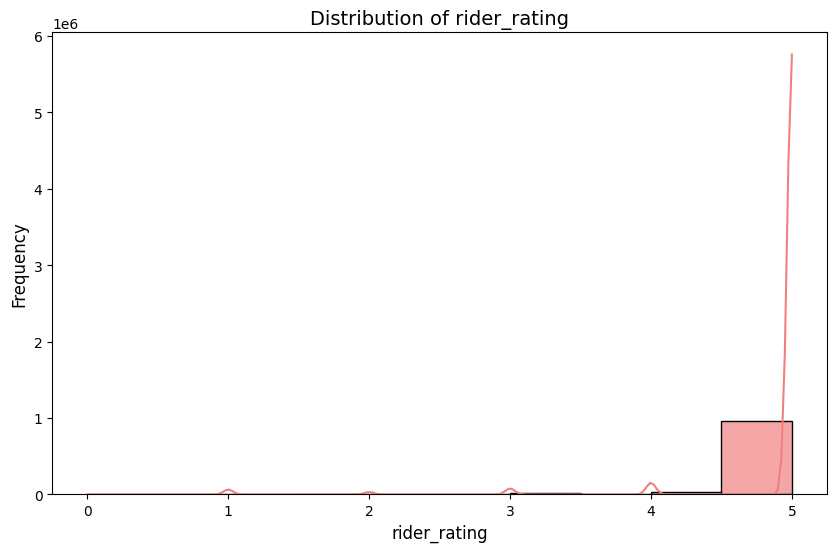

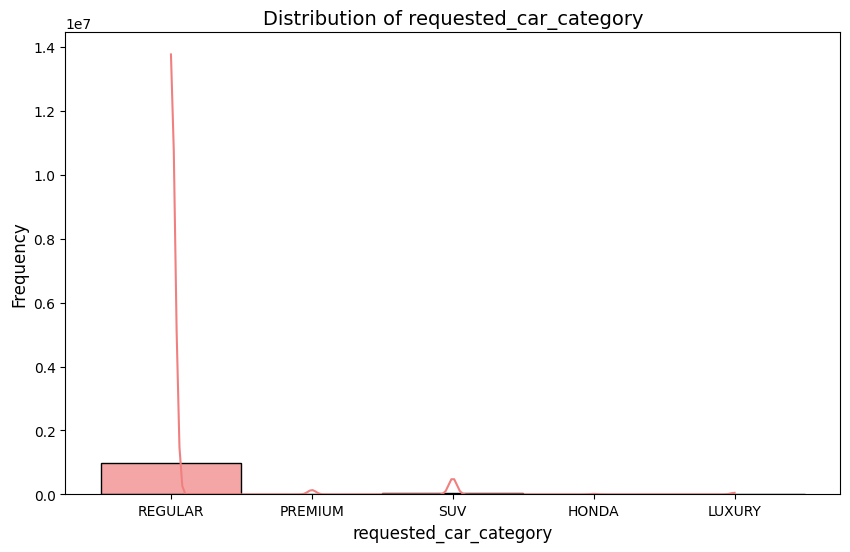

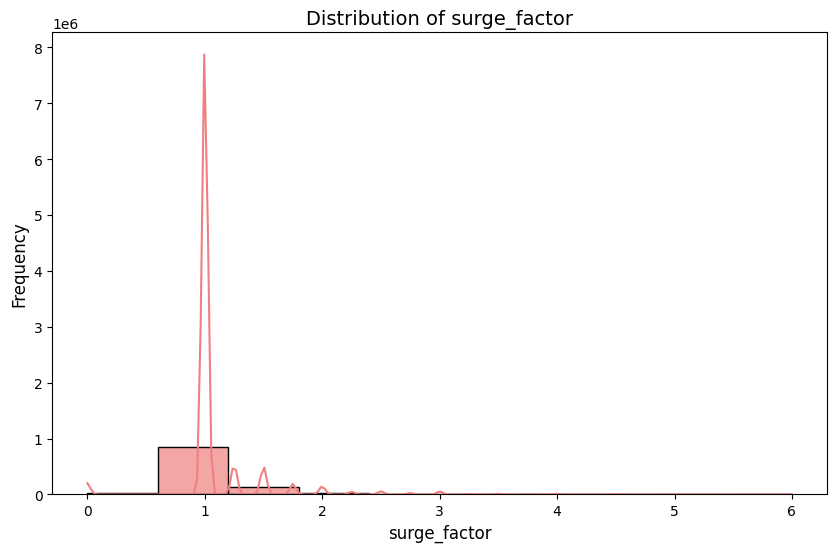

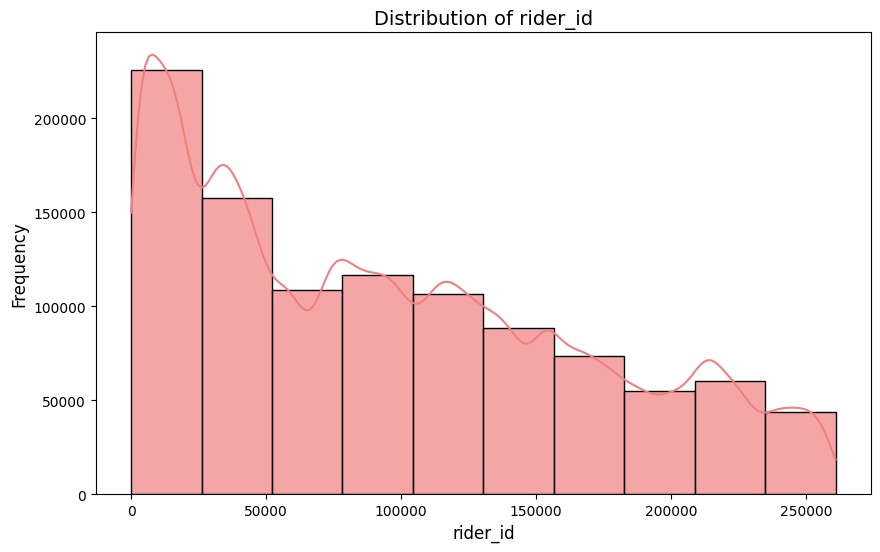

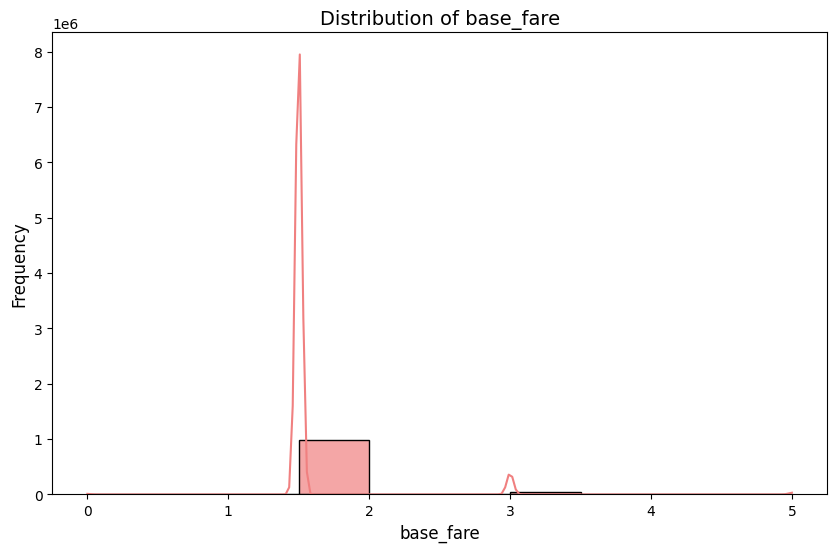

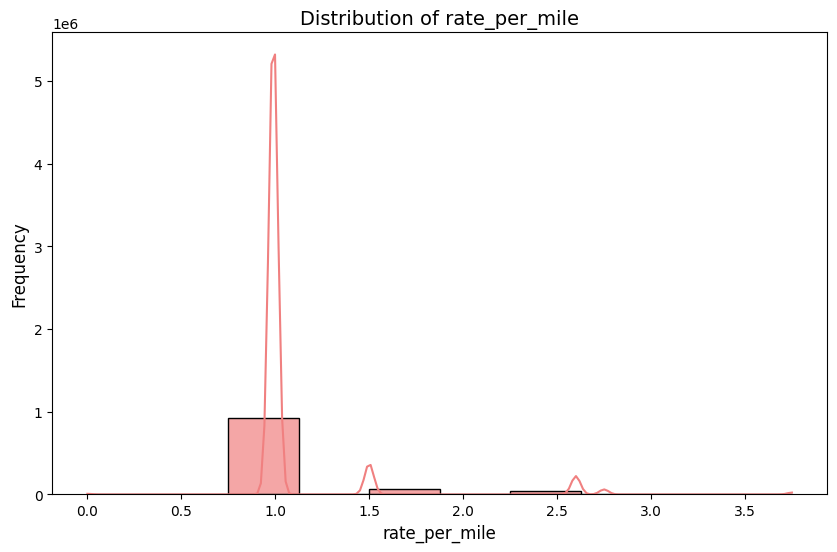

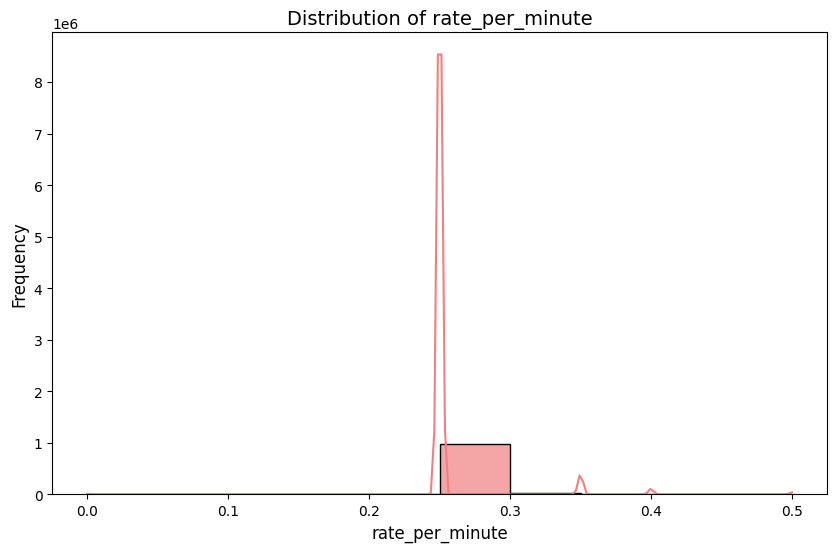

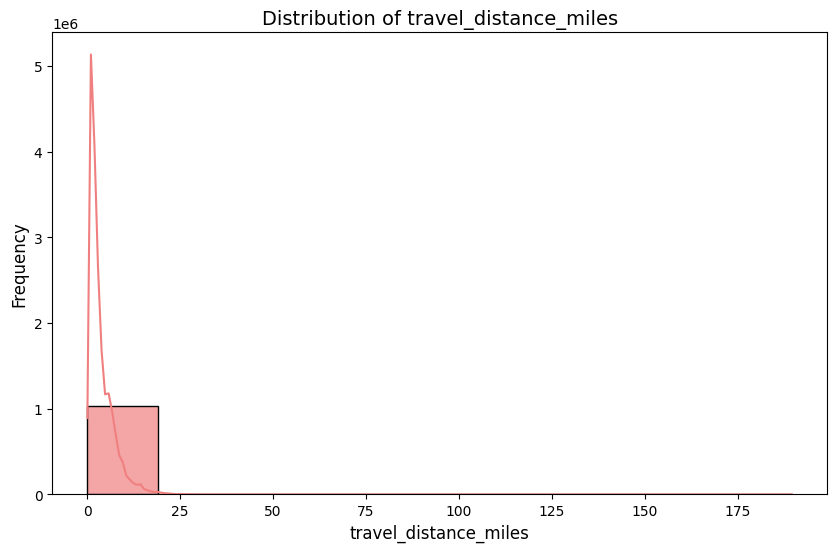

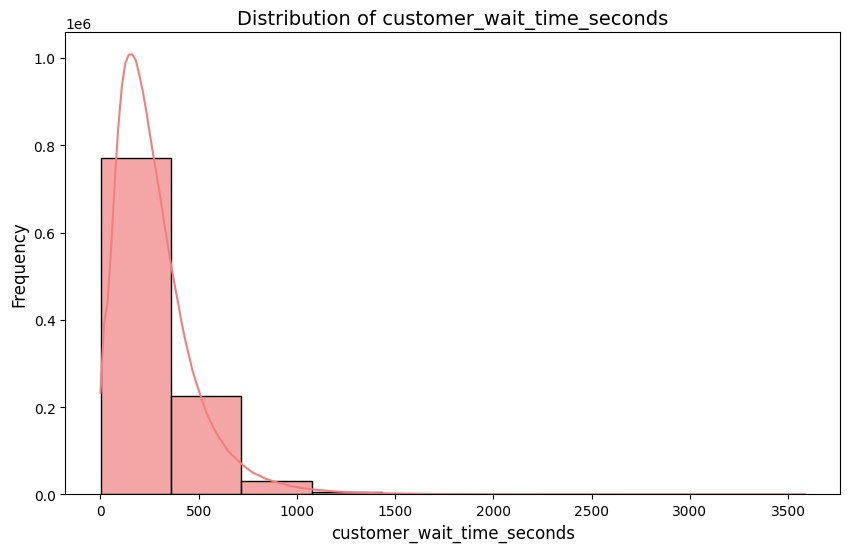

In [51]:
for col in range(len(cols_to_keep)):
    plot_histogram_kde(rides_data_condense, cols_to_keep[col], 
                        title=f"Distribution of {cols_to_keep[col]}", 
                        xlabel=f"{cols_to_keep[col]}",
                        bins=10, 
                        color="lightcoral")